# Visualisation de données de trafic

In [1]:
import geopandas as gpd
#matplotlib inline
import xml.etree.cElementTree as et
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt
from haversine import haversine
import os

## Geting started with a Python Notebook

* Edit Python cells
* Write documentation
* Embed graphics


## Getting started with Pandas

* create a dataframe `df = pd.DataFrame(columns = ['start_lon', 'start_lat'])`
* sample `df.head()` or `df.tail()`
* shape `df.shape()`
* plot `df.plot()`
* infos `df.infos()`
* filter mask `df_filtered = df[df["traffic_state"] == "V"]`
* size `df.size()`

More on pandas

* [Cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

## Plotting data on a map

* Using shapes [GeoPandas](http://geopandas.org/reference.html)
* Regular segments

## Référentiel des tronçons du Grand Lyon

Sous forme de Shapefile (`pvo_patrimoine_voirie.pvotronconwebcriter.shp`)
référentiel (sous forme de Shapefile) des points de mesures du Grand Lyon (`pvo_patrimoine_voirie.pvocomptagecriter.shp`)

In [2]:
# load shape files
chemin = '/home/diyes/Documents/ECL-1-1/PE/grandlyon' 
sf = gpd.GeoDataFrame.from_file(chemin+os.path.sep+'pvo_patrimoine_voirie.pvotronconwebcriter.dbf',encoding = 'gb18030')

In [3]:
# sample
sf.head()

,libelle,code,twgid,zoom,sens,fournisseu,idfourniss,longueur,gid,infotrafic,regulateur,calculateu,nombrevoie,geometry
0,AV CHARLES DE GAULLE,LYO01112,1112,2,1,CRITER,None,579,1,1,1,1,1,"LINESTRING (4.77465 45.75825, 4.76997 45.75420)"
1,AV MARECHAL FOCH,LYO01128,1128,2,2,CRITER,None,1046,2,1,1,1,1,"LINESTRING (4.79779 45.74127, 4.79781 45.74291..."
2,R CHATELAIN,LYO01132,1132,2,2,CRITER,None,308,3,0,1,1,None,"LINESTRING (4.79945 45.73540, 4.79700 45.73573..."
3,RTE DE BRUISSIN,LYO01158,1158,2,1,CRITER RD,None,1676,4,0,1,1,None,"LINESTRING (4.76191 45.73722, 4.76185 45.73711..."
4,AV DE LA TABLE DE PIERRE,LYO01166,1166,2,1,CRITER RD,None,1239,5,0,1,1,None,"LINESTRING (4.76544 45.75077, 4.76502 45.75067..."


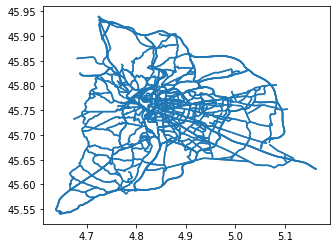

In [4]:
# plot geometry
sf.plot()

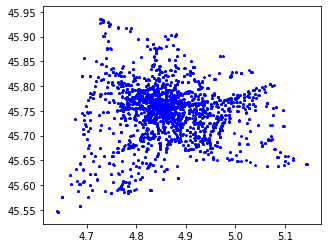

In [5]:
sf.representative_point().plot(marker='*', color='blue', markersize=5)
plt.show();

In [6]:
# compare sens


## Questions

* Afficher les les plus longues (histogrammes `.hist()` et filtrage)
* Comparer le sens des rues

## Alternative to geometry representation

In [7]:
# convert geometry to points
def linestring_to_points(feature,line):
    return {feature:list(line.coords)}

sf['points'] = sf.apply(lambda row: linestring_to_points(row['code'],row['geometry']),axis=1)

In [8]:
# sample points
sf.points.head()

0    {'LYO01112': [(4.7746503838148895, 45.75825348...
1    {'LYO01128': [(4.797787280144347, 45.741270172...
2    {'LYO01132': [(4.799451343876713, 45.735396123...
3    {'LYO01158': [(4.761906804324677, 45.737220547...
4    {'LYO01166': [(4.76543968646797, 45.7507720468...
Name: points, dtype: object

In [9]:
index_list = []
for i in range(len(sf)):
    for j in range(len(sf.points[i][sf.code[i]]) - 1):
        index_list_seg = [sf.points[i][sf.code[i]][j][0],sf.points[i][sf.code[i]][j][1],
                          sf.points[i][sf.code[i]][j+1][0], sf.points[i][sf.code[i]][j+1][1],
                         sf.code[i]]
        index_list.append(index_list_seg)

In [10]:
df = pd.DataFrame(columns = ['start_lon', 'start_lat', 'end_lon', 'end_lat', 'code'])

In [11]:
df['start_lon'] = list(i[0] for i in index_list)
df['start_lat'] = list(i[1] for i in index_list)
df['end_lon'] = list(i[2] for i in index_list)
df['end_lat'] = list(i[3] for i in index_list)
df['code'] = list(i[4] for i in index_list)

In [12]:
df.head()

,start_lon,start_lat,end_lon,end_lat,code
0,4.774650,45.758253,4.769970,45.754195,LYO01112
1,4.797787,45.741270,4.797814,45.742911,LYO01128
2,4.797814,45.742911,4.798819,45.744965,LYO01128
3,4.798819,45.744965,4.799089,45.746100,LYO01128
4,4.799089,45.746100,4.799103,45.746562,LYO01128


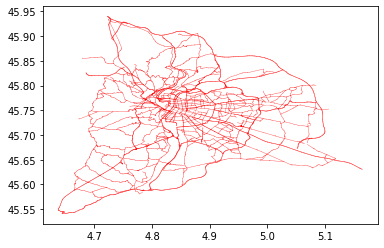

In [13]:
# same chart as above but using lines
plt.figure('asdf')
aa = plt.gca()
aa.plot([df.start_lon, df.end_lon], [df.start_lat, df.end_lat], color='r', linewidth=0.3, alpha=0.5)
plt.show(aa)

In [14]:
df.head()

,start_lon,start_lat,end_lon,end_lat,code
0,4.774650,45.758253,4.769970,45.754195,LYO01112
1,4.797787,45.741270,4.797814,45.742911,LYO01128
2,4.797814,45.742911,4.798819,45.744965,LYO01128
3,4.798819,45.744965,4.799089,45.746100,LYO01128
4,4.799089,45.746100,4.799103,45.746562,LYO01128


## Questions

* Why using geometry or line?

## Traffic data sources

Télécharger les données depuis [le site open data du Grand Lyon](https://data.grandlyon.com/jeux-de-donnees/etat-trafic-temps-reel-metropole-lyon/donnees)

Une section `<troncon_web_infotrafic>` par tronçon avec:

*  l'id du tronçon dans la balise `<id>` qui te permet de faire le lien avec la description géographique du tronçon associé dans le Shapefile sur l'attribut "twgid" du Shapefile
* l'état de trafic (traficolor) du tronçon dans la balise `<etat>`: `N` pour bloqué, `R` pour Rouge (saturé), `O` pour Orange (pré-saturé), `V` pour vert (fluide), `G` pour Gris (inconnu), `*` si pas de point de mesure) une ou plusieurs sections <point_de_mesure> par point(s) de mesure associé(s) au tronçon

 -  l'id du point de mesure dans la balise `<id_ptm>` qui te permet de faire le lien avec la description géographique du point de mesure associé dans le Shapefile sur l'attribut "identifian" du Shapefile
-  le débit 1minute du point de mesure dans la balise `<debit> (en nb de véhicules/heure)
-  le taux d'occupation 1 minute du point de mesure dans la balise `<taux>` (en %)
-  le débit 6minutes du point de mesure dans la balise `<debit_6min>` (en nb de véhicules/heure)
-  le taux d'occupation 6 minutes du point de mesure dans la balise `<taux_6min>` (en %)


Traffic_state (categorical): 
* `N` for congestion
* `R` for mild congestion
* `O` for smooth
* `V` for very smooth
* `G` unknown
* `\*` for no measuring point;



In [15]:
tree = et.ElementTree(file=chemin+os.path.sep+'Etat_Troncons_Web_InfoTrafic_2019_04_11_00h00.xml')
root = tree.getroot()

In [16]:
tree

*Sample nodes from the traffic data source file*
```
    <troncon_web_infotrafic>
        <id>2164</id>
        <code>LYO02164</code>
        <libelle>RD342</libelle>
        <sens>2</sens>
        <longueur>2583</longueur>
        <fournisseur>CRITER RD</fournisseur>
        <id_fournisseur></id_fournisseur>
        <etat>*</etat>
        <dateMaj>11/04/2019,00:00:50</dateMaj>
    </troncon_web_infotrafic>
    <troncon_web_infotrafic>
        <id>1082</id>
        <code>LYO01082</code>
        <libelle>ENTREE RD12/BUS _ JONCTION A7N/D301</libelle>
        <sens>2</sens>
        <longueur>870</longueur>
        <fournisseur>CORALY</fournisseur>
        <id_fournisseur>n2_dde0043</id_fournisseur>
        <etat>V</etat>
        <dateMaj>11/04/2019,00:00:50</dateMaj>
        <point_de_mesure>
            <id_ptm>2099</id_ptm>
            <libelle_ptm>Voie_A7_SaintFons_Paris_2</libelle_ptm>
            <debit>180</debit>
            <taux>0</taux>
            <debit_6min>380</debit_6min>
            <taux_6min>1</taux_6min>
            <nbMesureManquante_6mn>0</nbMesureManquante_6mn>
            <seuil_orange>20</seuil_orange>
            <seuil_rouge>30</seuil_rouge>
            <hd_mesure>11/04/2019,00:00:00</hd_mesure>
            <hd_mesure_6mn>10/04/2019,23:54:00</hd_mesure_6mn>
        </point_de_mesure>
    </troncon_web_infotrafic>
```

In [17]:
def traffic_statement(x):
    if x in traffic_state.keys():
        return traffic_state[x]
    else:
        return None

In [18]:
# expected final dataset
#df = pd.DataFrame(columns = ['start_lon', 'start_lat', 'end_lon', 'end_lat','code', 'time', 'hour', 'minute', # index values
                             #'distance','traffic_state','longueur', 'debit', 'vitesse', 'taux', 'debit_6min', 
                             #'taux_6min', 'nbMesureManquante_6mn', 'seuil_orange', 'seuil_rouge'])
#df_spie= pd.DataFrame(columns = ['longueur', 'debit', 'vitesse', 'taux', 'debit_6min', 
                             #'taux_6min', 'nbMesureManquante_6mn', 'seuil_orange', 'seuil_rouge'])
#h = 0 # hour
#m = 0 # minute

#file1 = '/home/diyes/Documents/ECL-1-1/PE/TT-traffic-dataviz-master'+os.path.sep+"Etat_Troncons_Web_InfoTrafic_2019_04_11_00h00.xml"
#file1 = 'Etat_Troncons_Web_InfoTrafic_2019_04_11_' + x + y +'.xml'
#tree = et.ElementTree(file = file1)
#root = tree.getroot()

        
#index_list = []
#for i in range(len(sf)):
    #for j in range(len(sf.points[i][sf.code[i]]) - 1):
        #index_list_seg = [sf.points[i][sf.code[i]][j][0],sf.points[i][sf.code[i]][j][1],
                          #sf.points[i][sf.code[i]][j+1][0], sf.points[i][sf.code[i]][j+1][1],
                         #sf.code[i]]
        #index_list.append(index_list_seg)
        
#traffic_state = {}
#for k in root.getchildren():
    #if k.tag != 'entete':
        #traffic_state[k.getchildren()[1].text] = k.getchildren()[7].text

#df = pd.DataFrame(columns = ['start_lon', 'start_lat', 'end_lon', 'end_lat', 'code'])
#liste_vitesse = list()
#liste_long = list()
#liste_debit = list()
#for l in root.findall('troncon_web_infotrafic'):
    #liste_long.append(l.find('longueur').text)
#for l in root.findall('point_de_mesure'):
    #liste_vitesse.append(l.find('vitesse').text)

#for l in root.findall('point_de_mesure'):
    #liste_debit.append(l.find('debit').text)
    
    
#print(liste_vitesse)    
#df['start_lon'] = list(i[0] for i in index_list)
#df['start_lat'] = list(i[1] for i in index_list)
#df['end_lon'] = list(i[2] for i in index_list)
#df['end_lat'] = list(i[3] for i in index_list)
#df['code'] = list(i[4] for i in index_list)
#df['time'] = root.getchildren()[0].getchildren()[0].text
#df['hour'] = h
#df['minute'] = m
#df_spie['longueur'] = liste_long
#df_spie['vitesse'] = liste_vitesse
#df_spie['debit'] = liste_debit
#df['distance']=df.apply(lambda row:haversine((row['start_lon'], row['start_lat']),
                                                     #(row['end_lon'], row['end_lat'])), axis=1)
#df['traffic_state']=df.apply(lambda row:traffic_statement(row['code']), axis=1)


#df_spie = pd.concat([df_spie, df], axis=0)
#print(m,h)
#print(len(liste_long))
#len(df)

In [19]:
#df_spie.head()

In [20]:
#plt.figure('asdf')
#aa = plt.gca()
#aa.plot([df_filtered.start_lon, df_filtered.end_lon], [df_filtered.start_lat, df_filtered.end_lat], color='r', linewidth=0.3, alpha=0.5)
#plt.show(aa)

In [21]:
#df.hist(column='time')

## Questions

* En vous inspirant de `traffic_state` enrichissez le jeu de données (ex : enlevez les `NaN` avec d'autres attributs : `'distance','traffic_state','longueur', 'debit', 'vitesse', 'taux', 'debit_6min', 'taux_6min', 'nbMesureManquante_6mn', 'seuil_orange', 'seuil_rouge'`
* Générez des graphiques descriptifs des dimensions. (e.g. `plt.figure() df.hist()` ou `df["traffic_state"].hist()`)
* Quel est le plus long tronçon sur Lyon ? Affichez-le
* Quelles sont les valeurs maximales pour la longueur ? `.max()`
* Quelle est la longueur moyenne d'un tronçon ?

Remarques 

* Pensez bien à typer/nettoyer les données, e.g. `pd.to_numeric(df.longueur, errors='coerce').fillna(0)` (remplace les valeurs non-numériques par 0
* Créer un index si calcul sur valeurs temporelles cumulées

Bonus
* Combinez les données au fil des heures
* Afficher le [graphique cumulé](https://stackoverflow.com/questions/37293014/draw-a-cumulative-chart-from-a-pandas-dataframe) de trafic (total, par segments) 

La rue la plus chargée est :  R MOUILLARD  et son débit est de : 2820  correspondant au code LYO02207 

ACCES A 42 DE A46 NORD ALYON    LYO02387


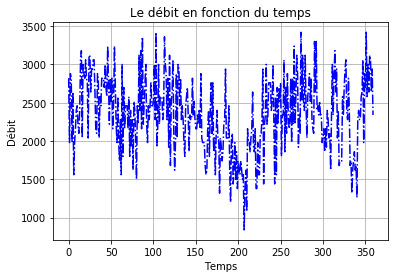

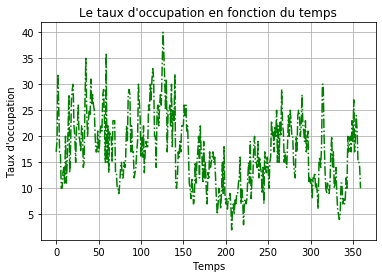

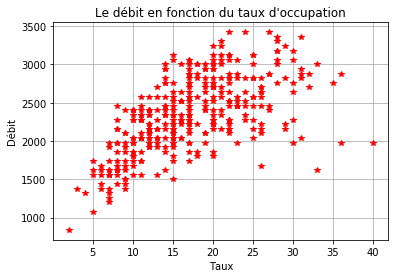

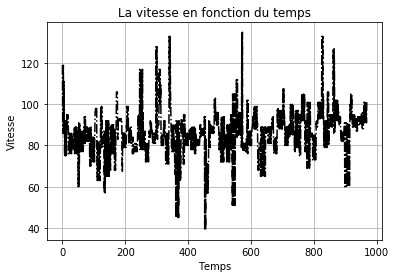

Les  25  rues les plus chargées sont : 

-->  R MOUILLARD  :  2820 ( LYO02207 )

-->  N383_PORTE DU MOULIN_PORTE DE GERLAND  :  1920 ( LYO0151 )

-->  ENTREE RD12/BUS _ SOLAIZE  :  1620 ( LYO01083 )

-->  BD DU VALVERT  :  1380 ( LYO00709 )

-->  A43_JONCTION A43/N383_SORTIE MAI 1945  :  1260 ( LYO0101 )

-->  N383_PORTE DE LA SOIE_PORTE DE MONTCHAT  :  1200 ( LYO0144 )

-->  SOLAIZE _ JONCTION A7N/A46S/A47  :  1140 ( LYO01085 )

-->  N383_PORTE DE CUSSET_PORTE DE LA SOIE  :  1080 ( LYO0143 )

-->  N383_PORTE DE CROIX LUIZET_PORTE DE CUSSET  :  1020 ( LYO0142 )

-->  A7N_JONCTION A7/A450_ST FONS  :  960 ( LYO0123 )

-->  PONT GEORGES CLEMENCEAU  :  900 ( LYO00572 )

-->  A7N_LA SAULAIE_PIERRE BENITE NORD  :  840 ( LYO0121 )

-->  A43_SORTIE  8 MAI 1945_PORTE DES ALPES  :  780 ( LYO0102 )

-->  N383_PORTE DES ETATS-UNIS_PORTE DU MOULIN A VENT  :  720 ( LYO0150 )

-->  QU JULES COURMONT  :  660 ( LYO00552 )

-->  R GARIBALDI  :  600 ( LYO00025 )

-->  QU JEAN MOULIN  :  540 ( LYO00550 )


In [25]:
"""-----------DANS CETTE PARTIE JE DÉTERMINE LA RUE LA PLUS CHARGÉ ENSUITE JE TRACE SON DÉBIT EN FONCTION DU TEMPS------"""


file1 = '/home/diyes/Documents/ECL-1-1/PE/TT-traffic-dataviz-master'+os.path.sep+"Etat_Troncons_Web_InfoTrafic_2019_04_11_00h00.xml"
tree = et.ElementTree(file = file1)
root = tree.getroot()

#Variables contenant les données de debit, de vitesse et de taux 
liste_debit = list()
liste_vitesse = list()
liste_taux = list()
vitesse_rue_max = [0, '', ''] # Je mets ici la vitesse maximale enregistrée et la rue correspondante
deb_max_rue = [0, '', ''] #Je mets ici le débit maximal enregistré et la rue correspondante.
trouve_deb = False
trouve_vitesse = False

for i in root.findall('troncon_web_infotrafic'):
    for j in i.findall('point_de_mesure'):
        deb = int(j.find('debit').text)
        if deb > deb_max_rue[0]:
            deb_max_rue[0] = deb
            trouve_deb = True
        if j.find('vitesse') != None:
            vitesse = int(j.find('vitesse').text)
            if vitesse > vitesse_rue_max[0]:
                vitesse_rue_max[0] = vitesse
                trouve_vitesse = True
    if trouve_deb == True: # j'enregistre le code et le nom de la rue ayant le débit le plus élevé
        deb_max_rue[1] = i.find('libelle').text
        deb_max_rue[2] = i.find('code').text   
        trouve_deb = False
    if  trouve_vitesse == True: # j'enregistre le code et le nom de la rue ayant la vitesse la plus élevée
        vitesse_rue_max[1] = i.find('libelle').text
        vitesse_rue_max[2] = i.find('code').text  
        trouve_vitesse = False   
    


print("La rue la plus chargée est : ",deb_max_rue[1]," et son débit est de :",deb_max_rue[0], " correspondant au code", deb_max_rue[2],"\n")
print(vitesse_rue_max[1],"  ",vitesse_rue_max[2])

for m in range(6):
    for n in range(60):
        x = (str(m) + 'h').zfill(3)
        y = str(n).zfill(2)
        file1 = '/home/diyes/Documents/ECL-1-1/PE/grandlyon/state_data/Etat_Troncons_Web_InfoTrafic_2019_04_11_' + x + y +'.xml'
        tree = et.ElementTree(file = file1)
        root = tree.getroot()
        
        for i in root.findall('troncon_web_infotrafic'):
            if i.find('libelle').text == deb_max_rue[1] and i.find('code').text == deb_max_rue[2]:
                for j in i.findall('point_de_mesure'):
                    deb = int(j.find('debit').text)
                    taux = int(j.find('taux').text)
                    liste_debit.append(deb)
                    liste_taux.append(taux)
            if i.find('libelle').text == vitesse_rue_max[1] and i.find('code').text == vitesse_rue_max[2]:
                for j in i.findall('point_de_mesure'):
                    vit = int(j.find('vitesse').text)
                    liste_vitesse.append(vit)


while -1 in liste_vitesse:
    liste_vitesse.remove(-1)
    
while -1 in liste_debit:
    liste_debit.remove(-1)
    
while -1 in liste_taux:
    liste_taux.remove(-1)
    
#print(len(liste_debit),"\n")
#print(len(liste_taux),"\n")
#print(len(liste_vitesse))
"""------AFFICHAGE DU DÉBIT EN FONCTION DU TEMPS POUR LA RUE LA PLUS CHAGÉE---------"""

x_temps_debit = array(range(len(liste_debit))) 
y_deb = array(liste_debit)

plot(x_temps_debit, y_deb, "b-.")
xlabel("Temps")
ylabel("Débit")
title("Le débit en fonction du temps")
grid()
show()

"""------AFFICHAGE DU DÉBIT EN FONCTION DU TEMPS POUR LA RUE LA PLUS CHAGÉE---------"""
x_temps_taux = array(range(len(liste_taux))) 
y_taux = array(liste_taux)

plot(x_temps_taux, y_taux, "g-.")
xlabel("Temps")
ylabel("Taux d'occupation")
title("Le taux d'occupation en fonction du temps")
grid()
show()

"""----- AFFICHAGE DU DÉBIT PAR RAPPORT AU TAUX D'OCCUPATION POUR LA RUE LA PLUS CHARGÉE-----"""

plot(y_taux, y_deb, "r*")
xlabel("Taux")
ylabel("Débit")
title("Le débit en fonction du taux d'occupation")
grid()
show()



"""----- AFFICHAGE DE LA VITESSE DANS LA RUE OU ELLE EST LA PLUS HAUTE-----"""
x_temps_vitesse = array(range(len(liste_vitesse))) 
y_vitesse =  array(liste_vitesse)

plot(x_temps_vitesse, y_vitesse, "k-.")
xlabel("Temps")
ylabel("Vitesse")
title("La vitesse en fonction du temps")
grid()
show()
                  
                
"""------CLASSEMENT DU DÉBIT DES RUES--------"""

file1 = '/home/diyes/Documents/ECL-1-1/PE/TT-traffic-dataviz-master'+os.path.sep+"Etat_Troncons_Web_InfoTrafic_2019_04_11_00h00.xml"
tree = et.ElementTree(file = file1)
root = tree.getroot()


liste_infos = list()
deb = 0
code = ''
libelle = ''

for i in root.findall('troncon_web_infotrafic'):
    for j in i.findall('point_de_mesure'):
        deb = int(j.find('debit').text)
    code = i.find('code').text
    libelle = i.find('libelle').text    
    liste_infos.append([deb, code, libelle])


liste_index = list() # je crée une liste d'index pour recupérer l'index des rues dont le débit est négatif ou nul
for i in enumerate(liste_infos):
    if i[1][0] <= 0:
        liste_index.append(i[0])

new_liste_infos = [] # Je crée une nouvelle liste qui ne contient pas les débits négatifs ou nuls
for i in range(0, len(liste_infos)):
    if i in liste_index:
        pass
    else:
        new_liste_infos.append(liste_infos[i])
        
#Cette fonction renvoie directement les 25 rues les plus chargées        
def rues_hauts_debits(liste_debits): 
    temp_0 = []
    for j in liste_debits:
        temp_0.append(j[0]) 

    temp_0 =  sorted(temp_0)    
    temp_1 = []
    for i in range(1,len(temp_0)):
        if temp_0[-i] in temp_1:
            pass
        else:
            temp_1.append(temp_0[-i])

    liste_finale = []        
    for j in temp_1:
        for k in new_liste_infos:
            if j == k[0]:
                liste_finale.append(k)
                break
    return liste_finale    
classment_deb = rues_hauts_debits(new_liste_infos)
print("Les ",len(classment_deb)," rues les plus chargées sont : \n")
for j in classment_deb:
    print("--> ",j[2]," : ",j[0],"(",j[1],")\n")

    

